In [23]:
%matplotlib inline
from dpm.train import train
from dpm.visualize import (
    plot_model, plot_models, plot_stats, 
    plot_hist, plot_loss_function, plot_loss_function_std
)
from dpm.distributions import Normal
from dpm.divergences import forward_kl, reverse_kl, js_divergence
from dpm.mixture_models import MixtureModel
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

### Forward KL

0.3069306718943708 7.2953532195672715


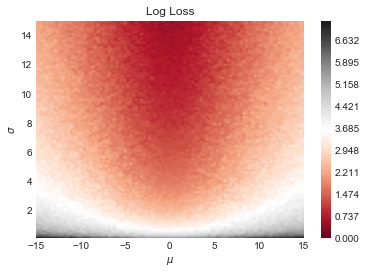

In [119]:
plot_loss_function(forward_kl, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))

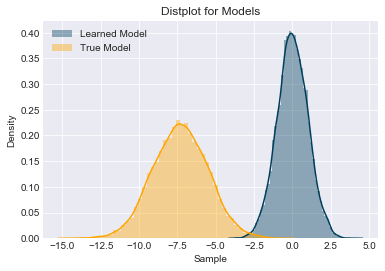

In [5]:
# Normal Examples:
p_model = Normal(-7.3, 3.2)
q_model = Normal(0., 1.)

plot_models(p_model, q_model)

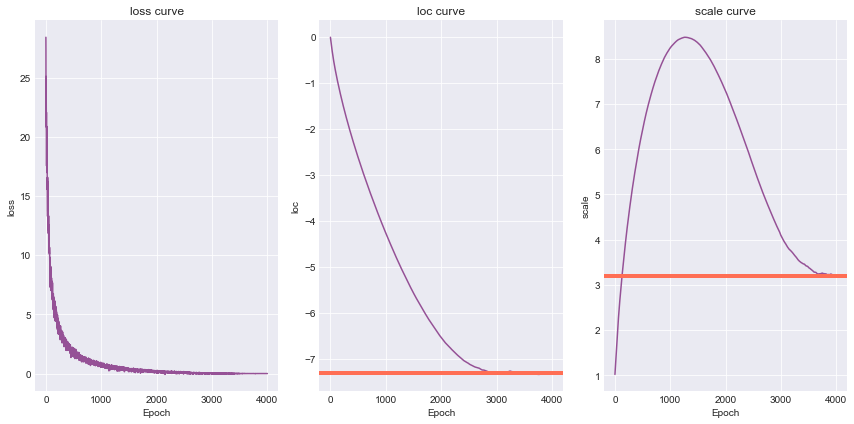

In [6]:
# Train
stats = train(p_model, q_model, forward_kl, epochs=4000)
plot_stats(stats, goals=[p_model.loc.item(), p_model.scale.item()])

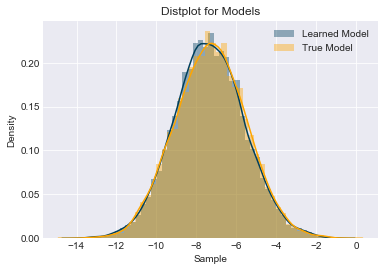

In [7]:
# Plot Result
plot_models(p_model, q_model)

### Forward KL Bimodal

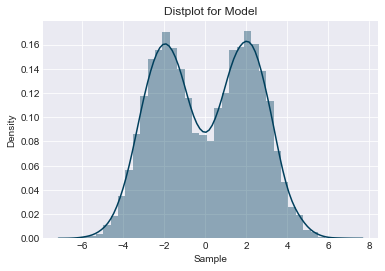

In [8]:
# plot a bimodal example
bimodal = MixtureModel([Normal(-2., 1.4), Normal(2., 1.4)], [0.5, 0.5])
plot_model(bimodal)

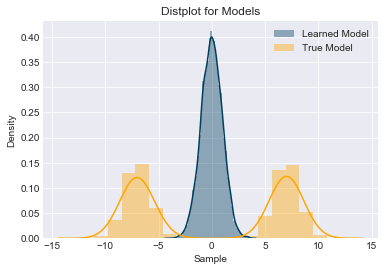

In [9]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)

In [ ]:
# Train
stats = train(p_model, q_model, forward_kl, epochs=4000)
plot_stats(stats)

In [ ]:
# Plot Result
plot_models(p_model, q_model)

0.27366517810881075 7.396326007427168


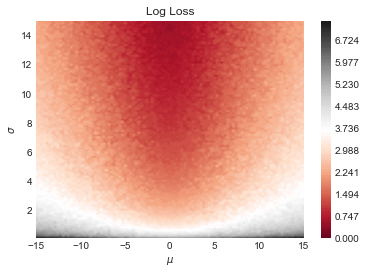

In [122]:
# plot loss dynamics
plot_loss_function(forward_kl, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))

### Reverse KL Bimodal

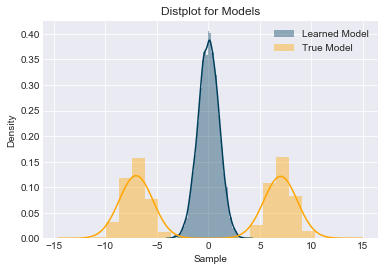

In [20]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)

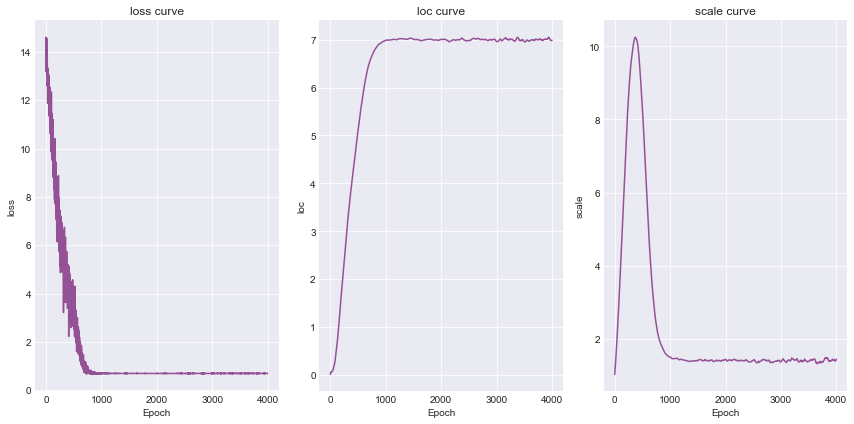

In [21]:
# Train (Mode Collapse)
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
stats = train(p_model, q_model, reverse_kl, epochs=4000)
plot_stats(stats)

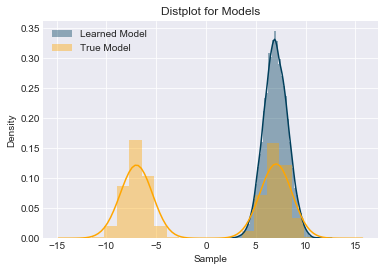

In [22]:
# Plot Result
plot_models(p_model, q_model)

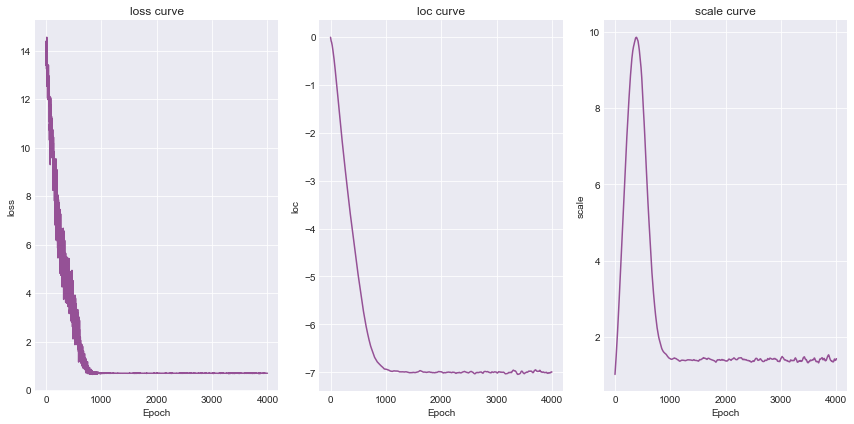

In [30]:
# Train 2 (Move to other side)
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
stats = train(p_model, q_model, reverse_kl, epochs=4000)
plot_stats(stats)

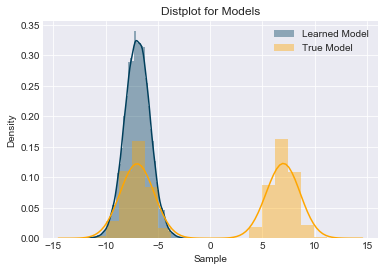

In [31]:
# Plot Result
plot_models(p_model, q_model)

-0.4564950285709768 3.520226904850845


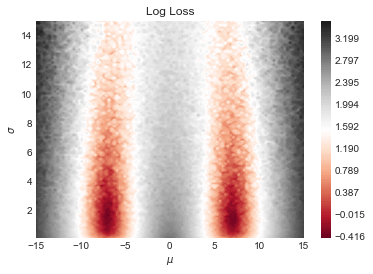

In [120]:
# plot loss dynamics
plot_loss_function(reverse_kl, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))

### Jensen-Shannon Divergence

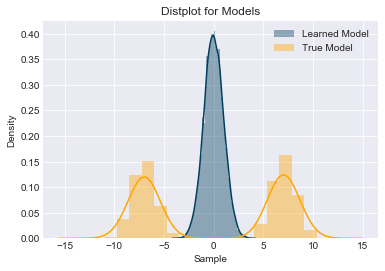

In [32]:
# Show dists
p_model = MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5])
q_model = Normal(0., 1.)
plot_models(p_model, q_model)

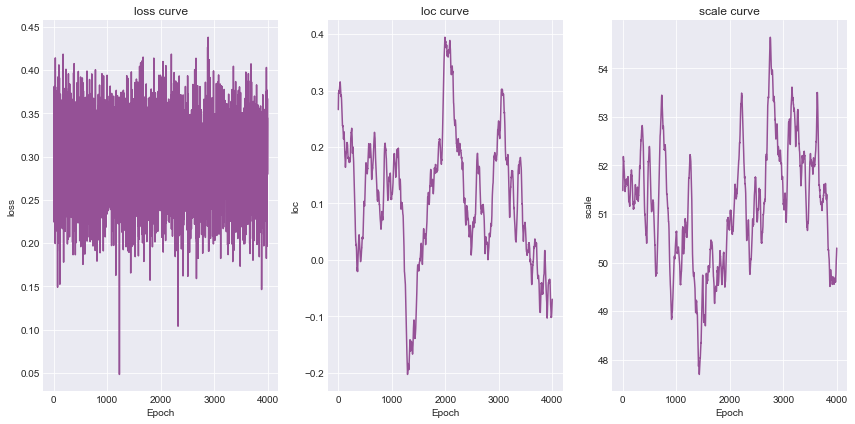

In [35]:
# Train
stats = train(p_model, q_model, js_divergence, epochs=4000)
plot_stats(stats)

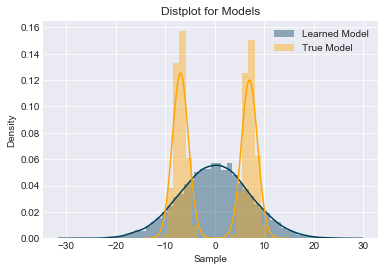

In [36]:
# Plot Result
plot_models(p_model, q_model)

-2.11633644181315 -0.366512917833829


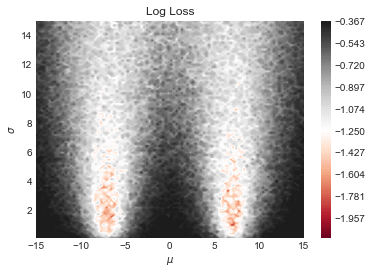

In [121]:
# plot loss dynamics
plot_loss_function(js_divergence, p_model=MixtureModel([Normal(-7., 1.4), Normal(7., 1.4)], [0.5, 0.5]))

### F-Divergence?